<a href="https://colab.research.google.com/github/MEGHANASAIP/Brain_Wave_Matrix_Solutions_Intern/blob/main/Sales_Data_Analysis_of_a_Commercial_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"meghanasaip","key":"a43acc6213a31c140c43a544c2bde1a3"}'}

In [5]:
!mv "kaggle (1).json" kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d faresashraf1001/supermarket-sales


Dataset URL: https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales
License(s): apache-2.0
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 88.5MB/s]


In [7]:
!unzip supermarket-sales.zip -d supermarket_sales


Archive:  supermarket-sales.zip
  inflating: supermarket_sales/SuperMarket Analysis.csv  


In [8]:
import pandas as pd

# Check what files are inside the folder
import os
print(os.listdir("supermarket_sales"))

# Read the CSV file (adjust the name if needed)
sales = pd.read_csv("supermarket_sales/SuperMarket Analysis.csv")


# Display first few rows
sales.head()


['SuperMarket Analysis.csv']


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
sales.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Sales,float64


In [10]:
sales['Date'][0]

'1/5/2019'

In [11]:
type(sales['Date'][0])

str

In [12]:
from pandas import to_datetime

In [13]:
sales['Date']=to_datetime(sales['Date'])

In [14]:
type(sales['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
sales['Time'] = to_datetime(sales['Time'], format='%I:%M:%S %p', errors='coerce')


In [18]:
type(sales['Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
sales['Date'][0]

Timestamp('2019-01-05 00:00:00')

In [20]:
sales['Time'][0]

Timestamp('1900-01-01 13:08:00')

In [21]:
def fetch_att_date(x):
  day=x.day
  month=x.month
  year=x.year
  return pd.Series([day,month,year])

In [22]:
sales[['Day','Month','Year']]=sales['Date'].apply(fetch_att_date)

In [23]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [24]:
def fetch_att_time(x):
  hour=x.hour
  minute=x.minute
  second=x.second
  return pd.Series([hour,minute,second])

In [25]:
sales[['Hour','Minute','Second']]=sales['Time'].apply(fetch_att_time)


In [26]:
sales.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,...,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute,Second
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,5,1,2019,13,8,0
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,8,3,2019,10,29,0
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,3,3,2019,13,23,0
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,27,1,2019,20,33,0
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,8,2,2019,10,37,0


In [27]:
sales.describe()

,Unit price,Quantity,Tax 5%,Sales,Date,Time,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute,Second
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,1900-01-01 15:24:41.879999744,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000,30.09800,0.0
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,1900-01-01 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000,0.00000,0.0
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,1900-01-01 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000,16.00000,0.0
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,1900-01-01 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000,30.00000,0.0
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,1900-01-01 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000,44.00000,0.0
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,1900-01-01 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000,59.00000,0.0
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857,16.88068,0.0


In [28]:
sales.describe().T

,count,mean,min,25%,50%,75%,max,std
Unit price,1000.0,55.67213,10.08,32.875,55.23,77.935,99.96,26.494628
Quantity,1000.0,5.51,1.0,3.0,5.0,8.0,10.0,2.923431
Tax 5%,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
Sales,1000.0,322.966749,10.6785,124.422375,253.848,471.35025,1042.65,245.885335
Date,1000,2019-02-14 00:05:45.600000,2019-01-01 00:00:00,2019-01-24 00:00:00,2019-02-13 00:00:00,2019-03-08 00:00:00,2019-03-30 00:00:00,NaN
Time,1000,1900-01-01 15:24:41.879999744,1900-01-01 10:00:00,1900-01-01 12:43:00,1900-01-01 15:19:00,1900-01-01 18:15:00,1900-01-01 20:59:00,NaN
cogs,1000.0,307.58738,10.17,118.4975,241.76,448.905,993.0,234.17651
gross margin percentage,1000.0,4.761905,4.761905,4.761905,4.761905,4.761905,4.761905,0.0
gross income,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
Rating,1000.0,6.9727,4.0,5.5,7.0,8.5,10.0,1.71858


In [29]:
sales.corr(numeric_only=True)


,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute,Second
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.057021,-0.027387,NaN,0.008242,-0.006869,NaN
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.043347,-0.014524,NaN,-0.007317,-0.014929,NaN
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770,-0.027480,NaN
Sales,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770,-0.027480,NaN
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770,-0.027480,NaN
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770,-0.027480,NaN
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.007076,-0.042880,NaN,-0.030588,0.050558,NaN
Day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,NaN,-0.002515,-0.007076,1.000000,-0.118996,NaN,0.020668,0.012645,NaN
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,-0.118996,1.000000,NaN,0.043762,-0.006554,NaN


In [30]:
np.round(sales.corr(numeric_only=True),2)

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute,Second
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.06,-0.03,NaN,0.01,-0.01,NaN
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,-0.04,-0.01,NaN,-0.01,-0.01,NaN
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03,NaN
Sales,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03,NaN
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03,NaN
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03,NaN
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.01,-0.04,NaN,-0.03,0.05,NaN
Day,0.06,-0.04,-0.00,-0.00,-0.00,NaN,-0.00,-0.01,1.00,-0.12,NaN,0.02,0.01,NaN
Month,-0.03,-0.01,-0.02,-0.02,-0.02,NaN,-0.02,-0.04,-0.12,1.00,NaN,0.04,-0.01,NaN


<Axes: >

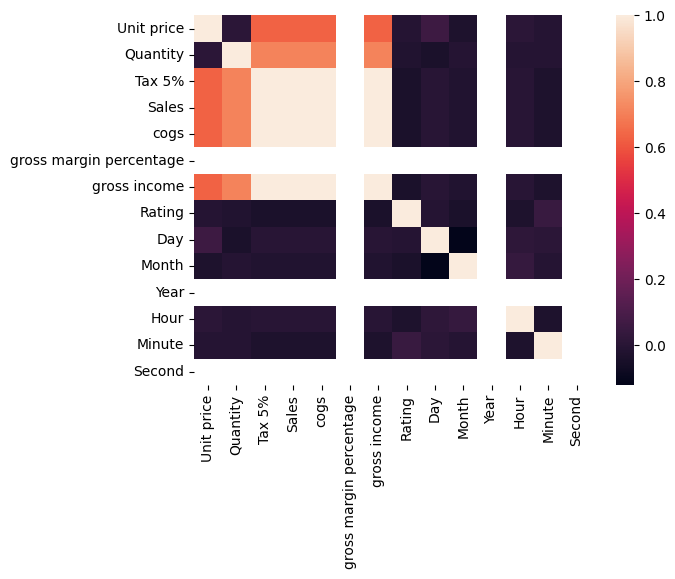

In [31]:
sns.heatmap(np.round(sales.corr(numeric_only=True),2))

<Axes: >

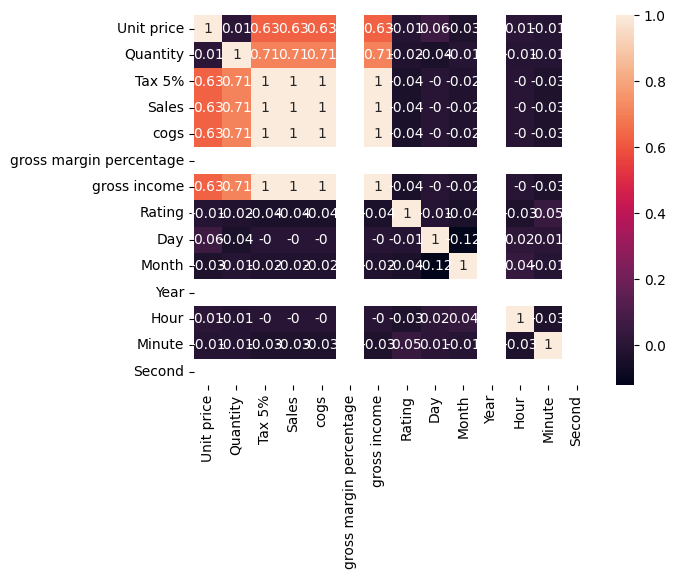

In [32]:
sns.heatmap(np.round(sales.corr(numeric_only=True),2),annot=True)

<Axes: >

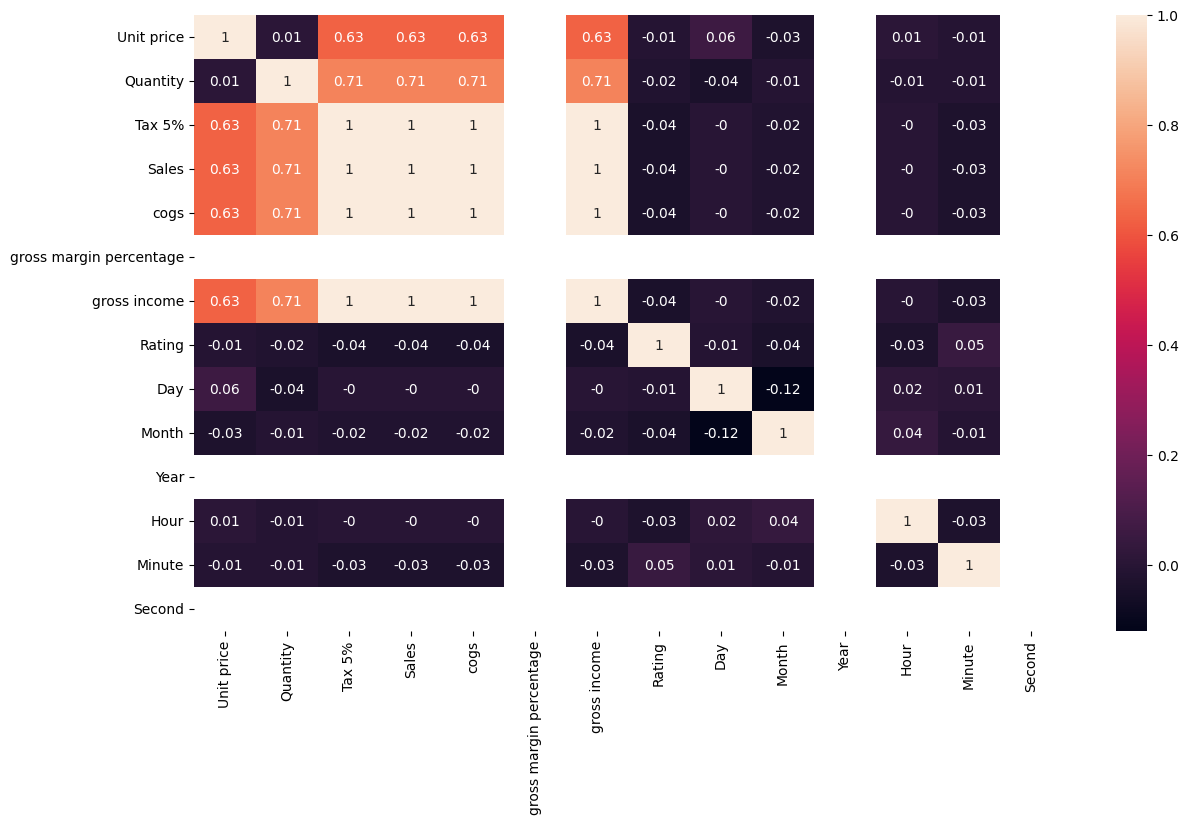

In [33]:
plt.figure(figsize=(14,8))
sns.heatmap(np.round(sales.corr(numeric_only=True),2),annot=True)

<Axes: xlabel='Sales', ylabel='cogs'>

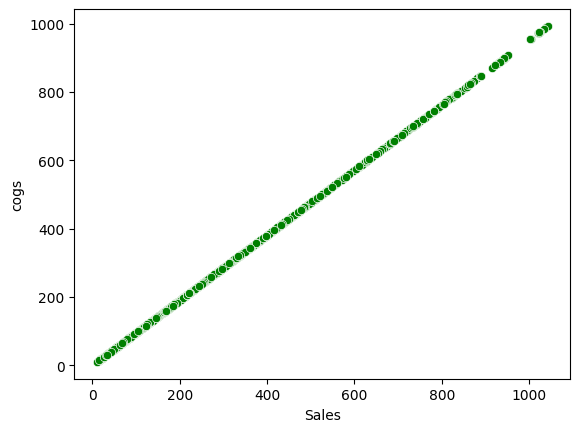

In [34]:
sns.scatterplot(x='Sales',y='cogs',data=sales,color='green')

<Axes: xlabel='Sales', ylabel='Rating'>

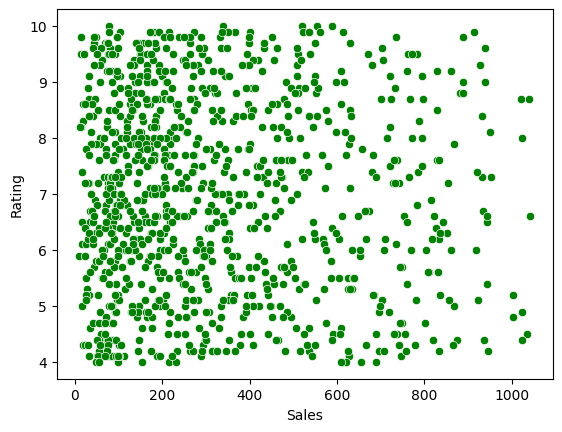

In [35]:
sns.scatterplot(x='Sales',y='Rating',data=sales,color='green')

<Axes: xlabel='Quantity', ylabel='Sales'>

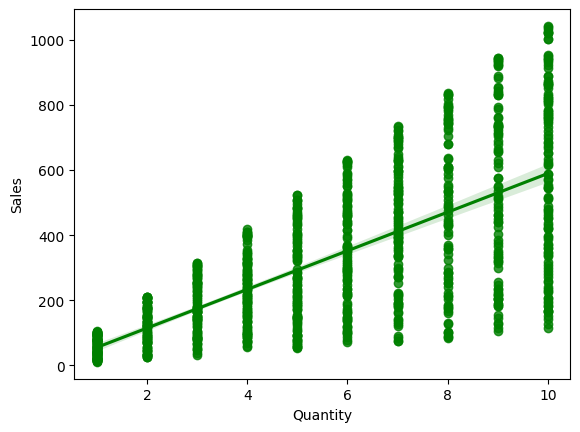

In [36]:
sns.regplot(x='Quantity',y='Sales',data=sales,color='green')

<Axes: xlabel='Tax 5%', ylabel='Sales'>

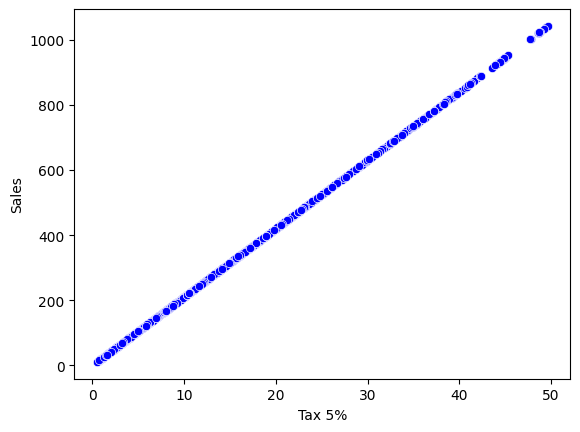

In [37]:
sns.scatterplot(x='Tax 5%', y='Sales',data=sales,color='blue')

In [38]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'Year', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [39]:
sales['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [40]:
sales.groupby(sales['City'])['gross income'].median()

,gross income
City,
Mandalay,12.04200
Naypyitaw,12.92475
Yangon,11.46800


In [41]:
sales.groupby(sales['City'])['gross income'].median().sort_values(ascending=False)

,gross income
City,
Naypyitaw,12.92475
Mandalay,12.04200
Yangon,11.46800


<ipython-input-42-036d5be0680d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

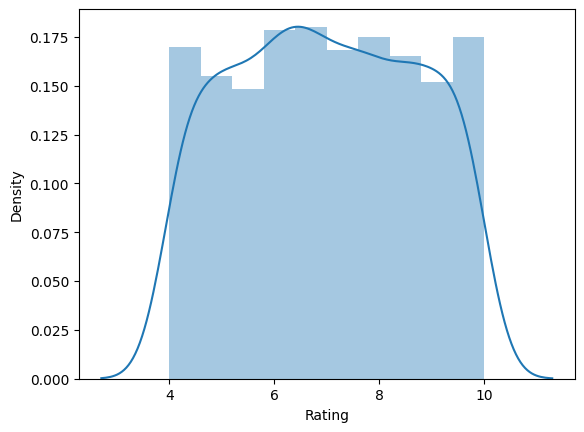

In [42]:
sns.distplot(sales['Rating'])

<ipython-input-43-c03875d9407f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Rating'],kde=False)


<Axes: xlabel='Rating'>

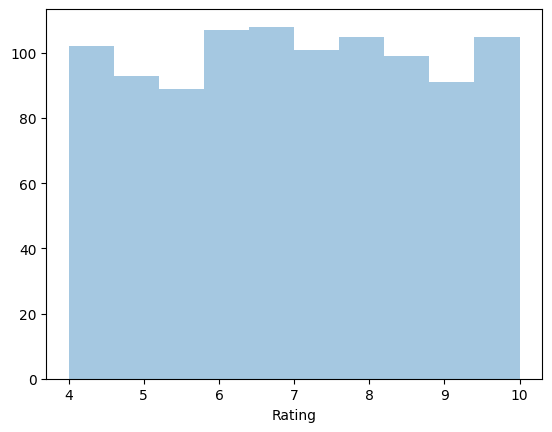

In [43]:
sns.distplot(sales['Rating'],kde=False)

In [44]:
np.mean(sales['Rating'])

np.float64(6.9727)

In [45]:
sales['Rating'].mean()

np.float64(6.9727)

<ipython-input-46-f00a924e24af>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Rating'],kde=False)


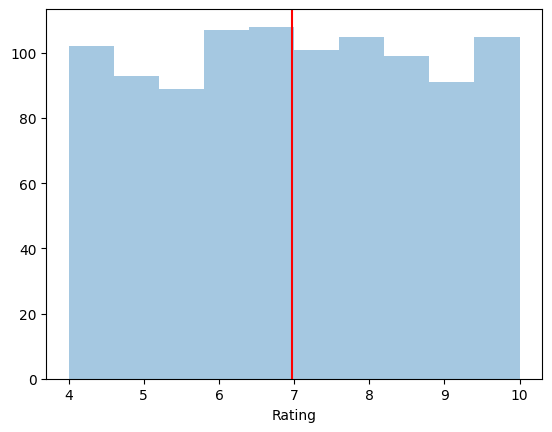

In [46]:
sns.distplot(sales['Rating'],kde=False)
plt.axvline(x=sales['Rating'].mean(),c='red')

In [61]:
def countplot(column, hue_name=None):
  return sns.countplot(x=column,data=sales,hue=hue_name)

In [48]:
def boxplot(x_column,y_column):
  return sns.boxplot(x=x_column,y=y_column,data=sales)

In [49]:
def lineplot(x_column,y_column):
  return sns.lineplot(x=x_column,y=y_column,data=sales)

In [50]:
def relplot(x_column, y_column, col_name=None, row_name=None, rel_type=None, style_name=None, hue_name=None):
    return sns.relplot(
        x=x_column,
        y=y_column,
        data=sales,
        col=col_name,
        row=row_name,
        kind=rel_type,
        style=style_name,
        hue=hue_name
    )


<Axes: xlabel='Branch', ylabel='Rating'>

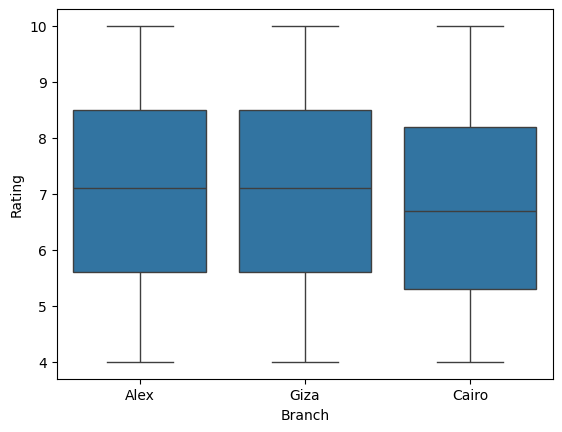

In [51]:
boxplot('Branch','Rating')

<Axes: xlabel='Hour', ylabel='Quantity'>

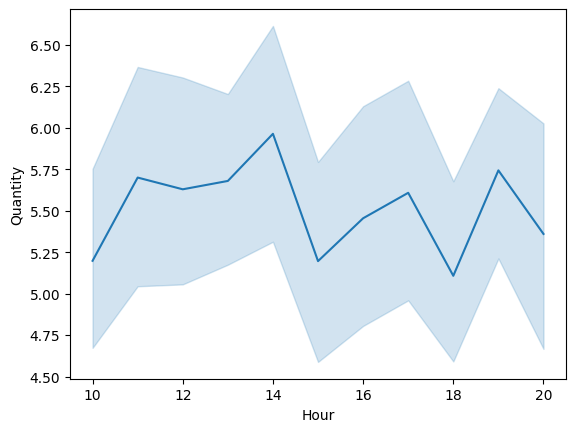

In [52]:
lineplot('Hour','Quantity')

<Axes: xlabel='Hour', ylabel='Sales'>

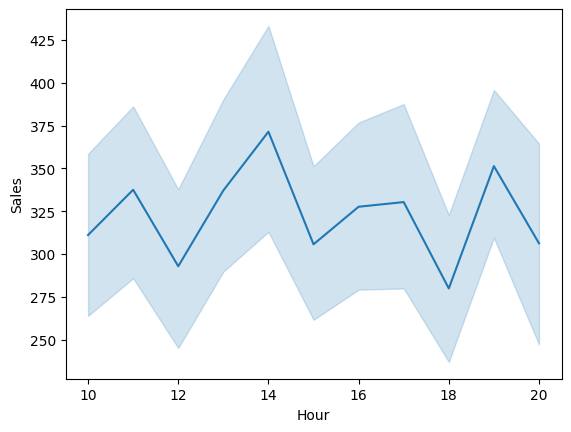

In [53]:
lineplot('Hour','Sales')

In [54]:
sales.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,...,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute,Second
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,5,1,2019,13,8,0
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,8,3,2019,10,29,0
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,3,3,2019,13,23,0
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,27,1,2019,20,33,0
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,8,2,2019,10,37,0


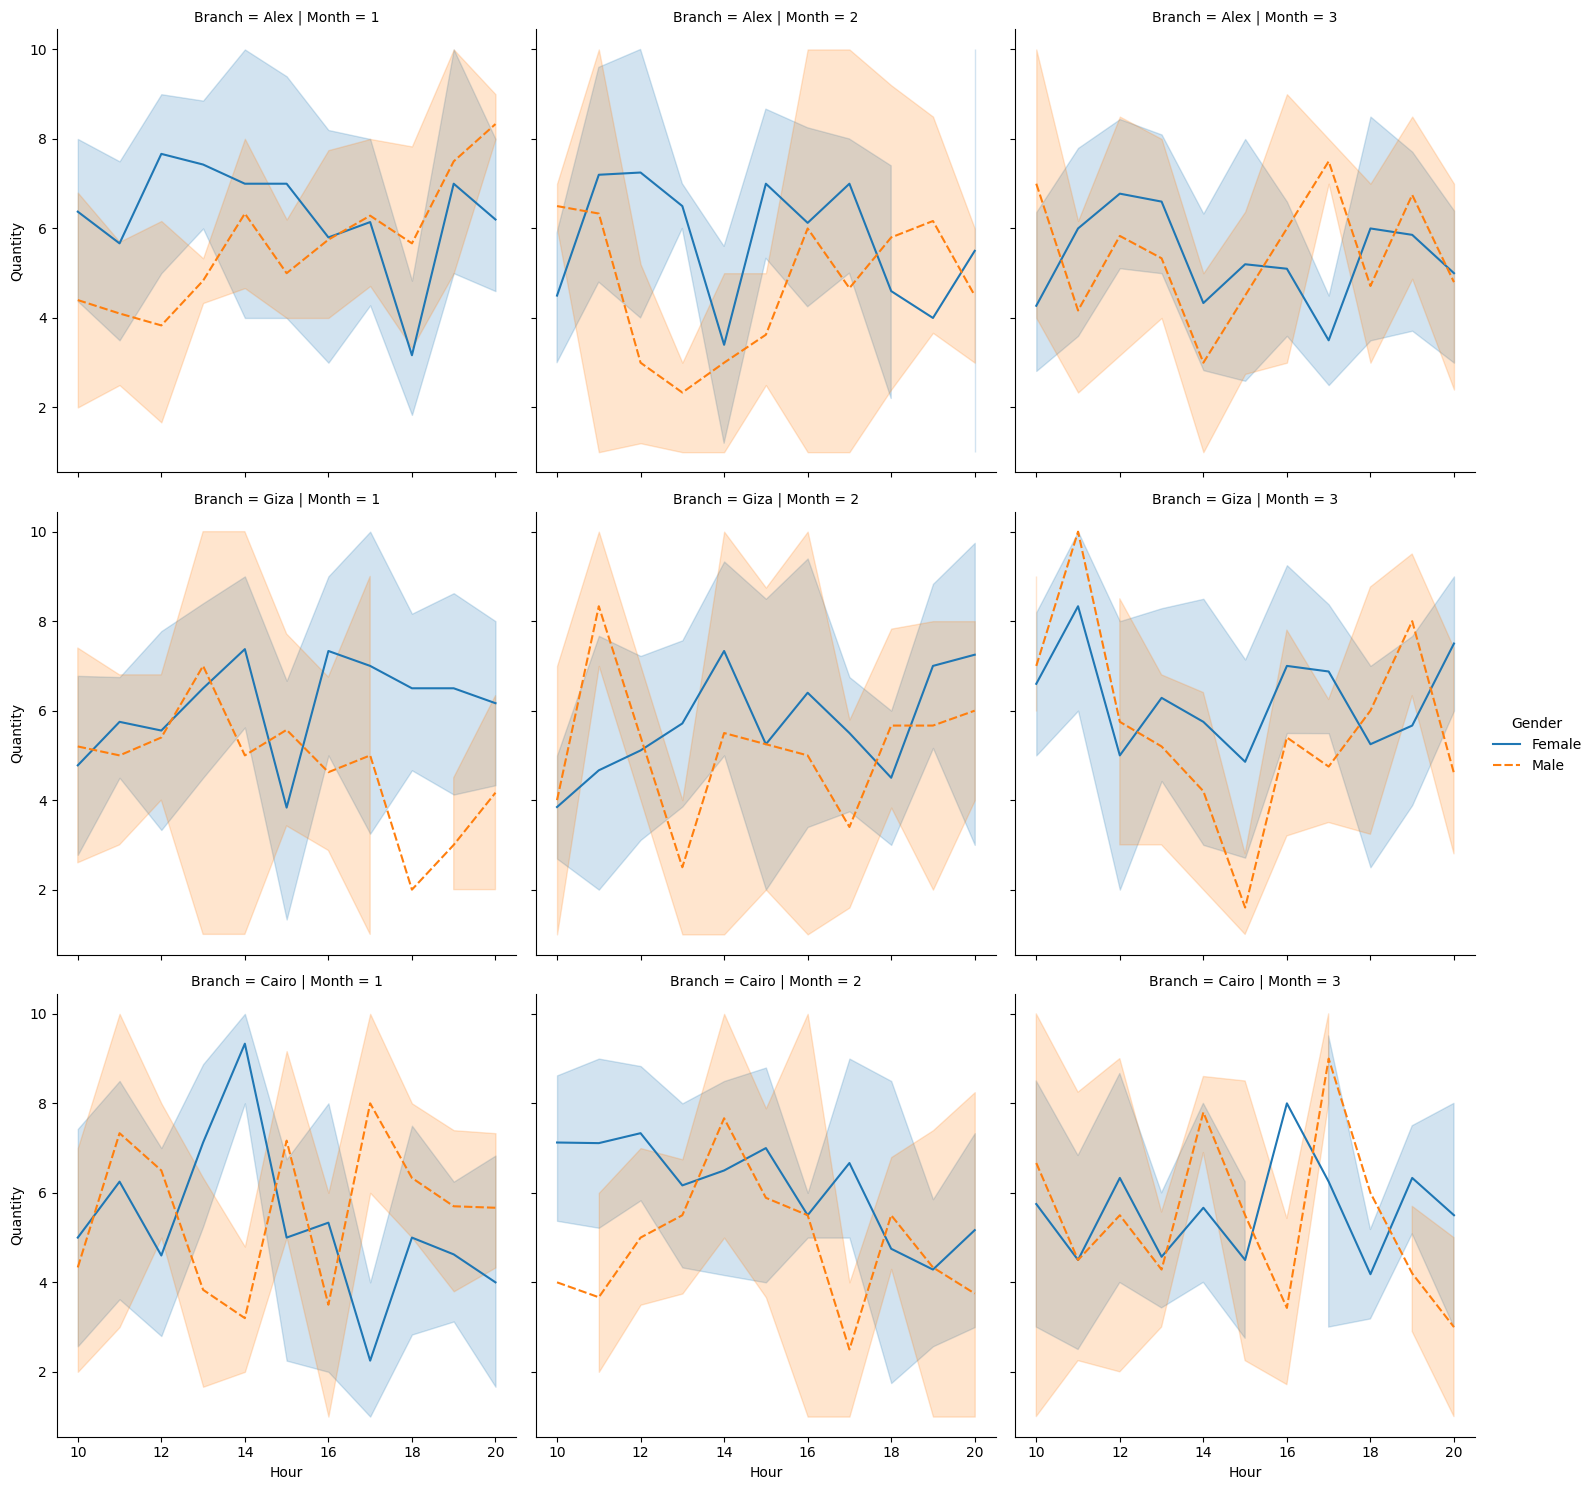

In [55]:
relplot(
    x_column='Hour',
    y_column='Quantity',
    col_name='Month',
    row_name='Branch',
    rel_type='line',
    style_name='Gender',
    hue_name='Gender'
)


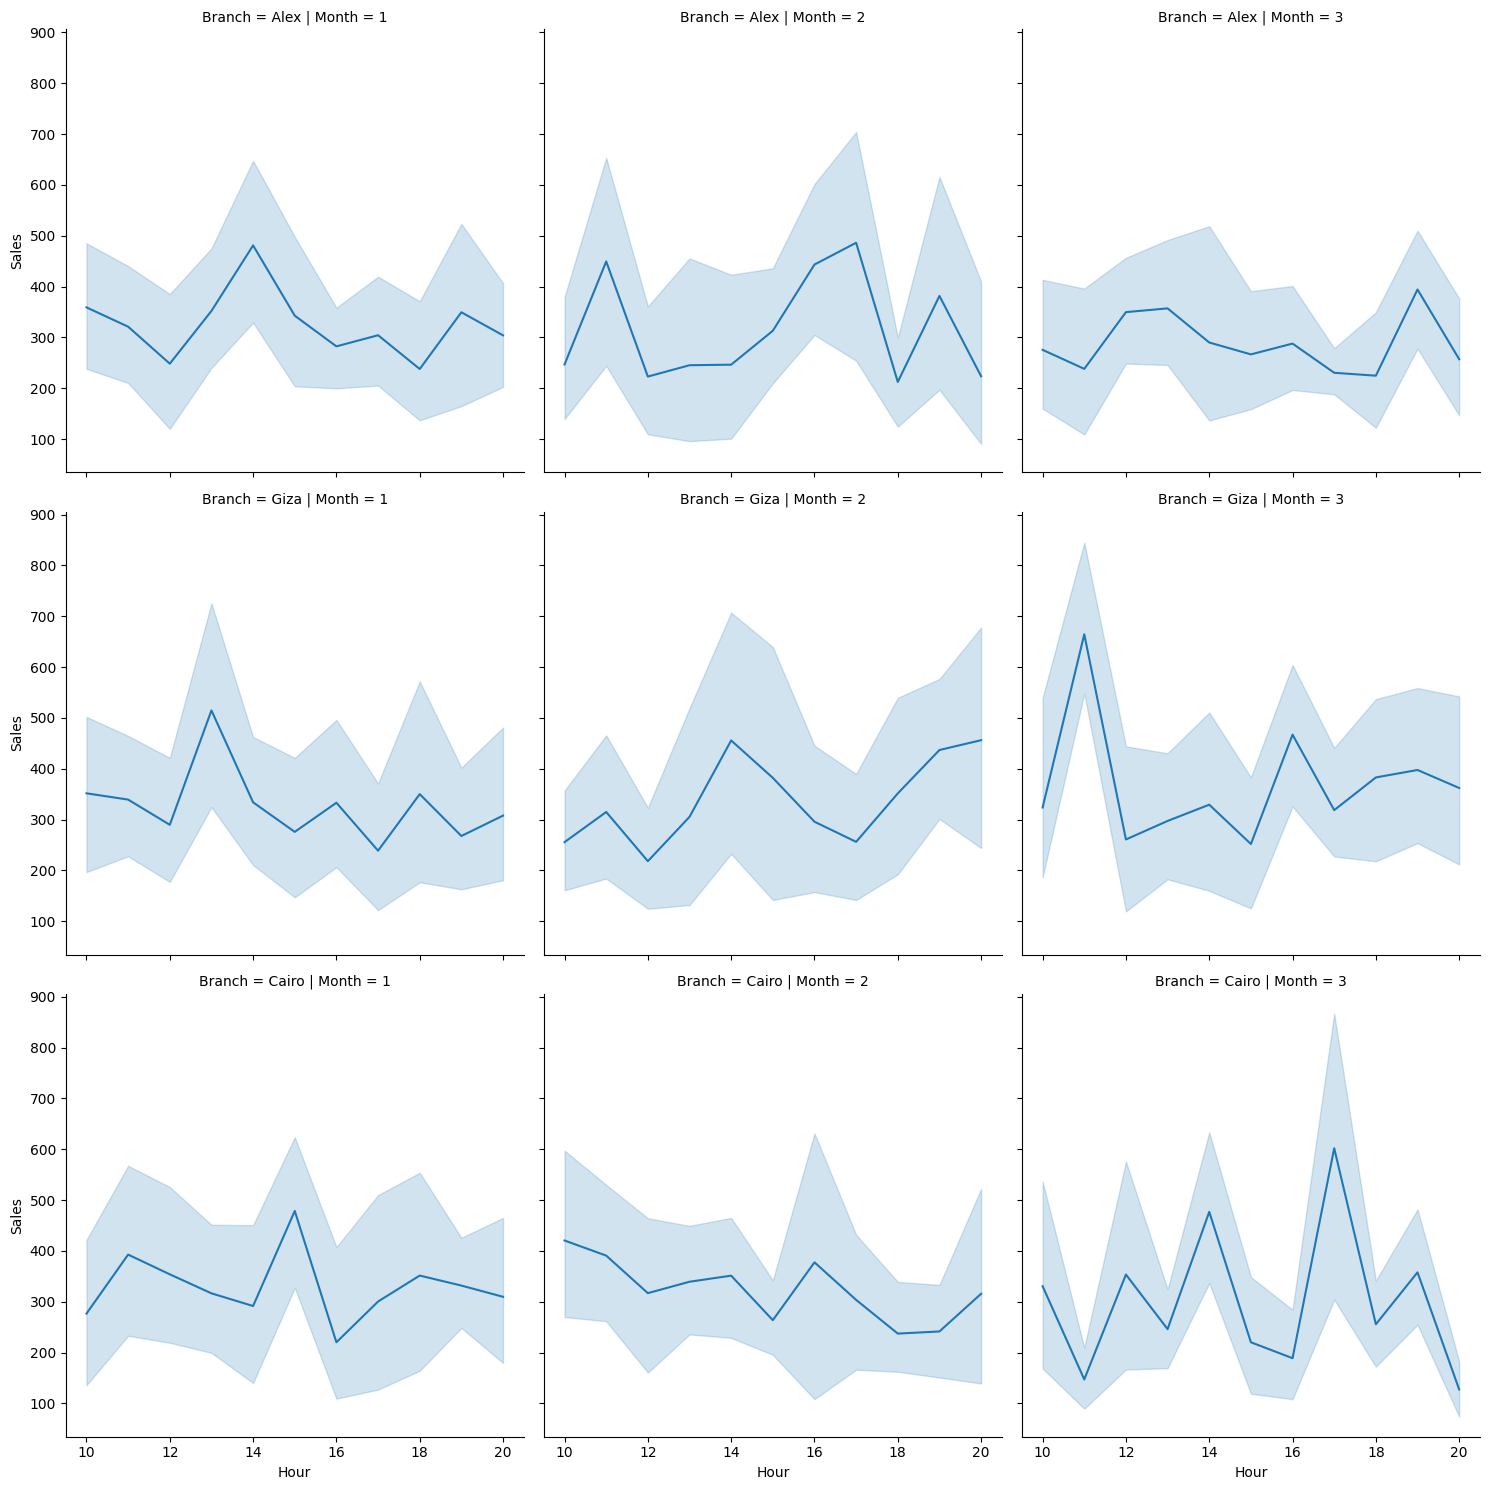

In [56]:
relplot(
    x_column='Hour',
    y_column='Sales',
    col_name='Month',
    row_name='Branch',
    rel_type='line',
)



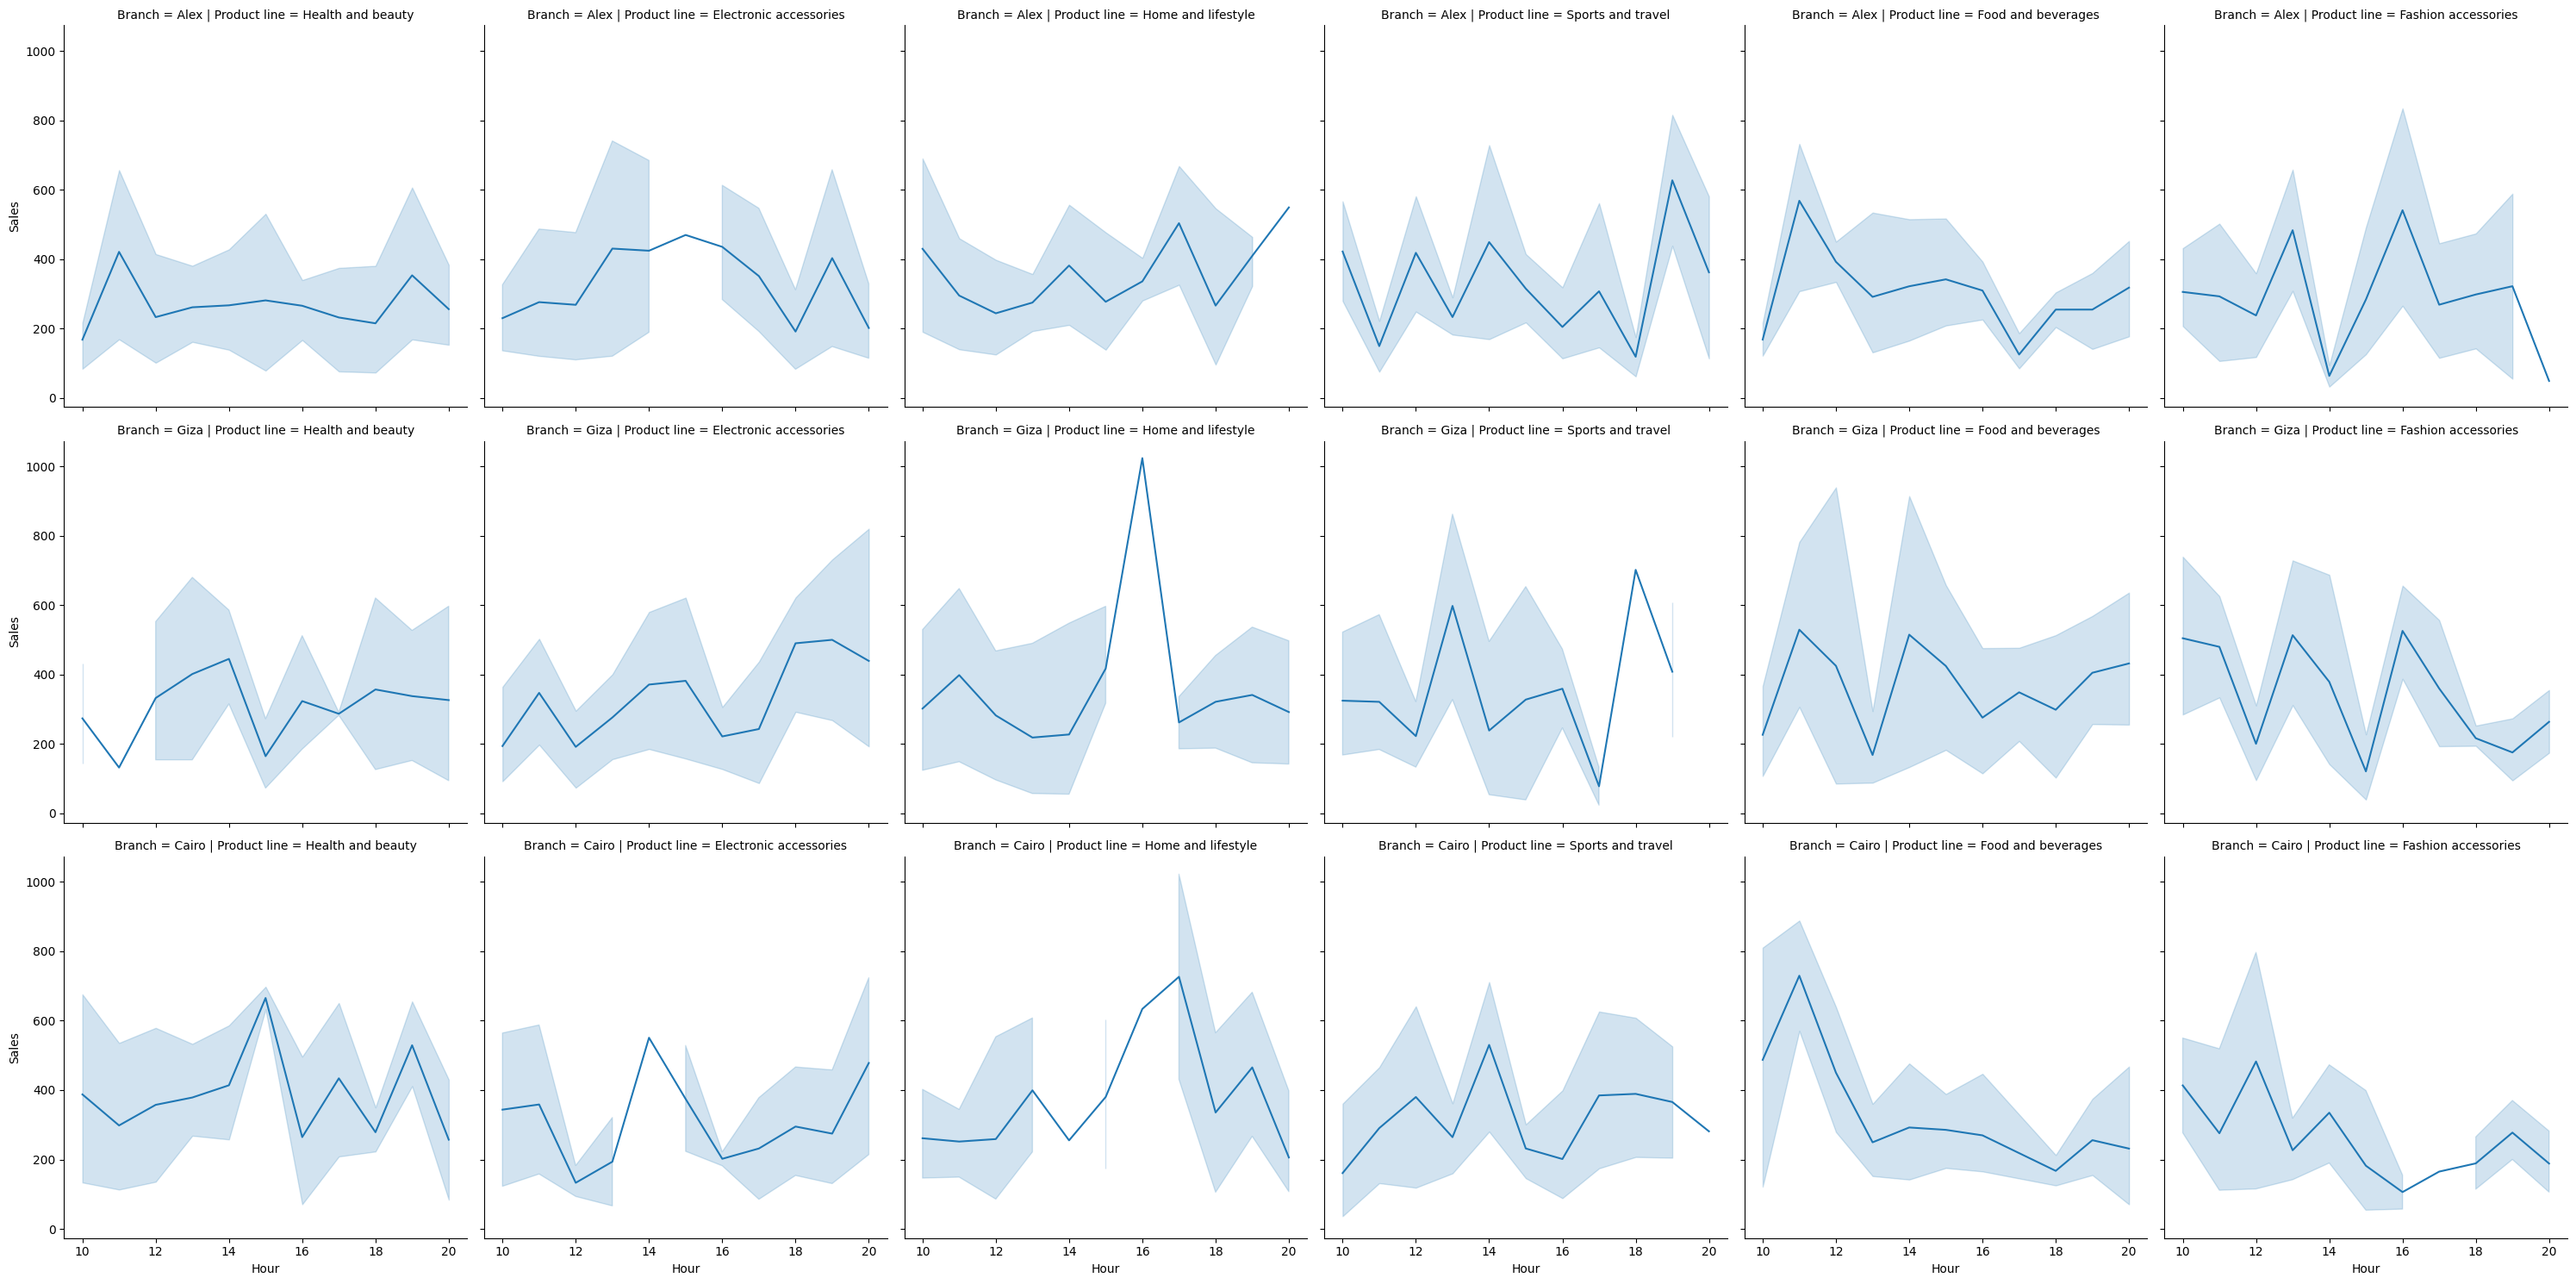

In [57]:
relplot(
    x_column='Hour',
    y_column='Sales',
    col_name='Product line',
    row_name='Branch',
    rel_type='line',

)


<Axes: xlabel='Quantity', ylabel='Product line'>

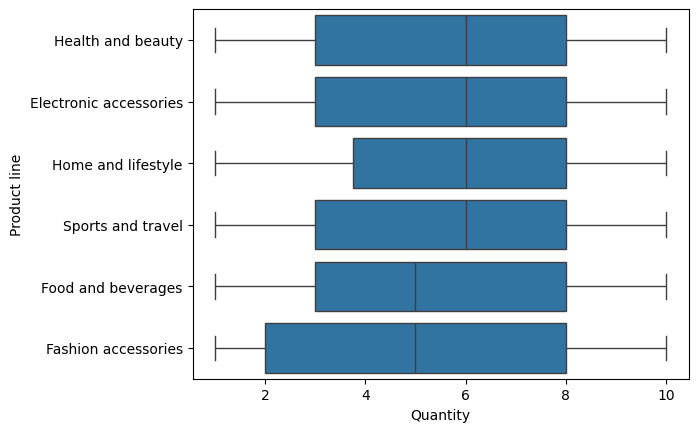

In [59]:
boxplot('Quantity','Product line')

<Axes: xlabel='Product line', ylabel='count'>

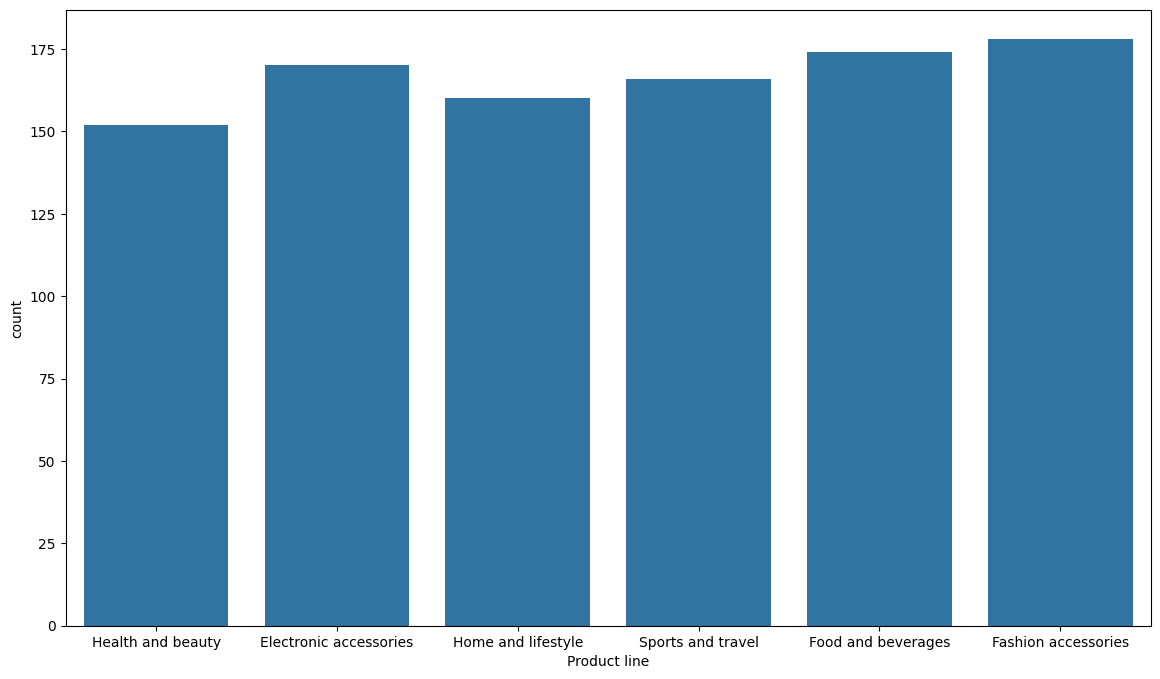

In [63]:
plt.figure(figsize=(14,8))
countplot('Product line')

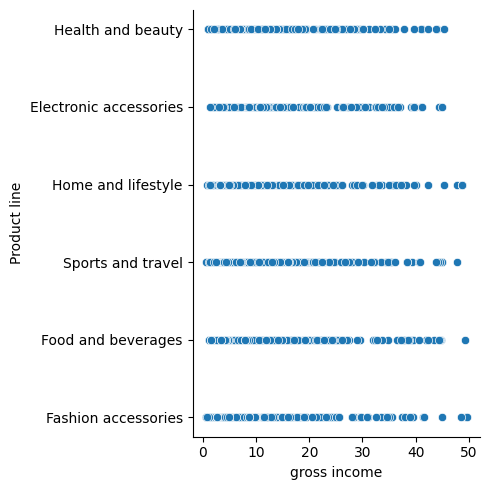

In [64]:
relplot(x_column='gross income', y_column='Product line',rel_type='scatter')

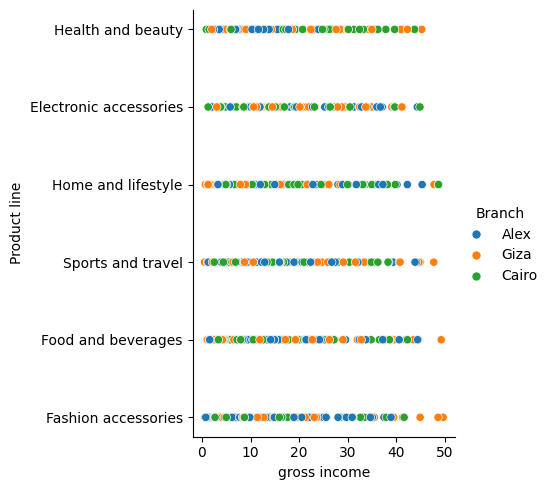

In [65]:
relplot(x_column='gross income', y_column='Product line',rel_type='scatter',hue_name='Branch')

<Axes: xlabel='Payment', ylabel='count'>

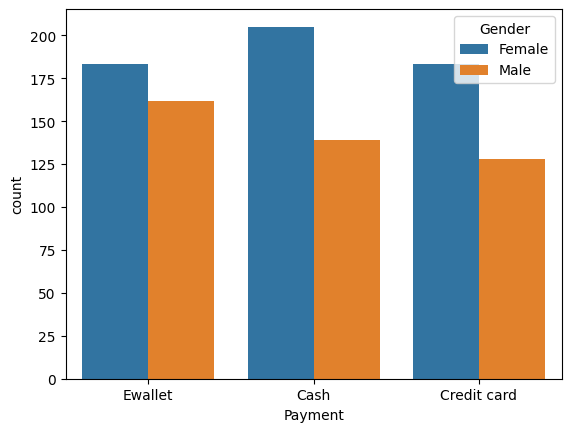

In [67]:
countplot('Payment',hue_name='Gender')

<Axes: xlabel='Payment', ylabel='count'>

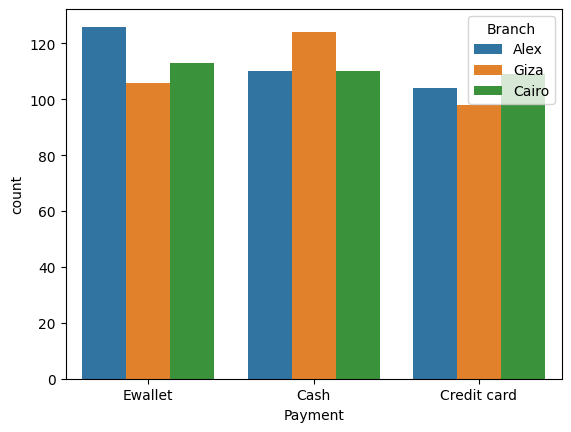

In [68]:
countplot('Payment',hue_name='Branch')

In [70]:
sales.groupby('Customer type')['Sales'].sum()

,Sales
Customer type,
Member,189694.764
Normal,133271.985


In [72]:
sales.groupby('Customer type').agg({'Sales':'sum'})

,Sales
Customer type,
Member,189694.764
Normal,133271.985


<Axes: xlabel='Rating', ylabel='count'>

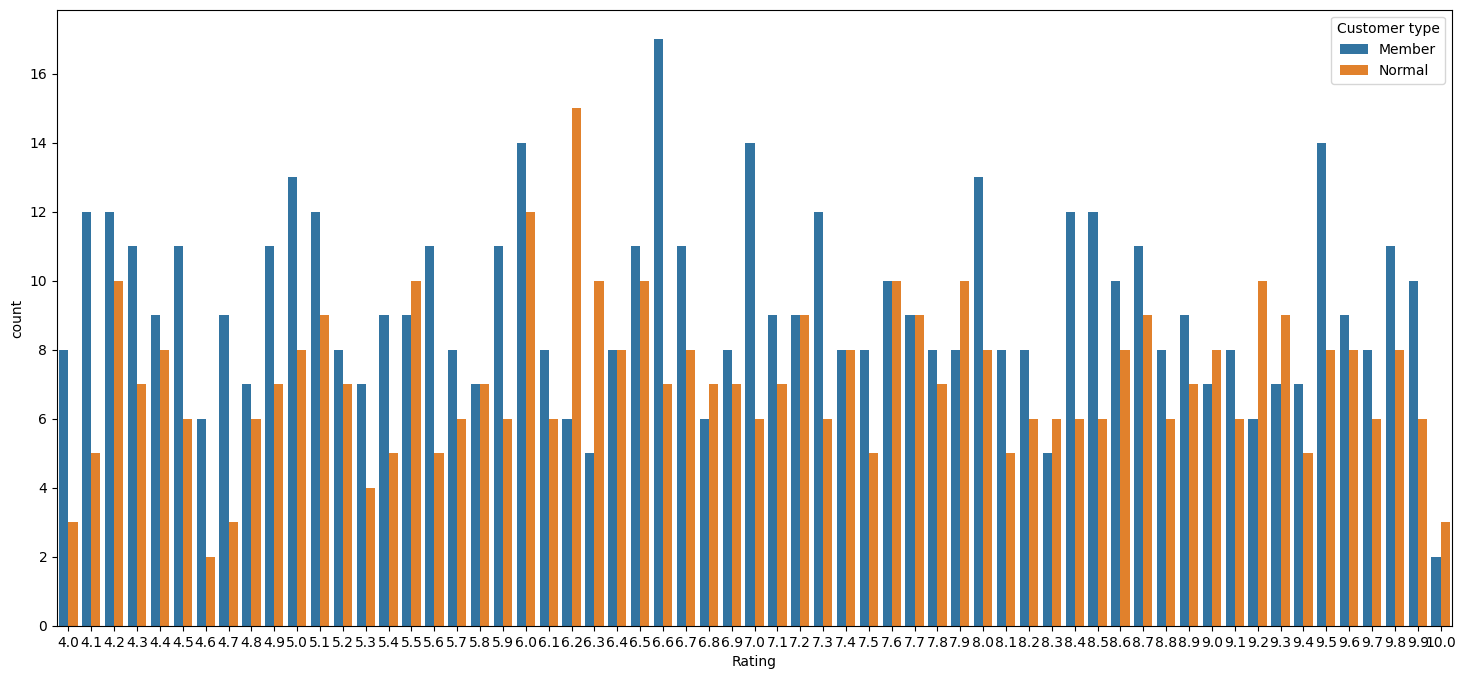

In [76]:
plt.figure(figsize=(18,8))
countplot('Rating',hue_name='Customer type')

<ipython-input-78-c03875d9407f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Rating'],kde=False)


<Axes: xlabel='Rating'>

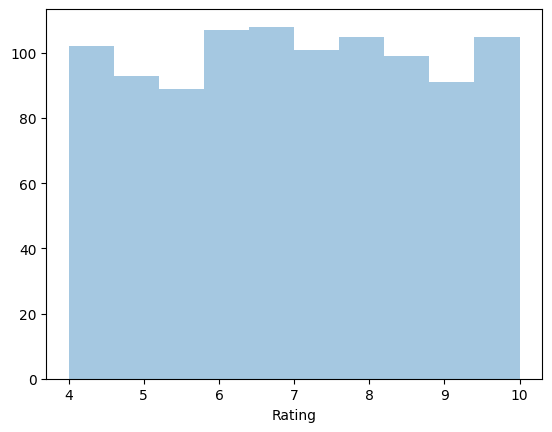

In [78]:
sns.distplot(sales['Rating'],kde=False)

<Axes: xlabel='Customer type', ylabel='Rating'>

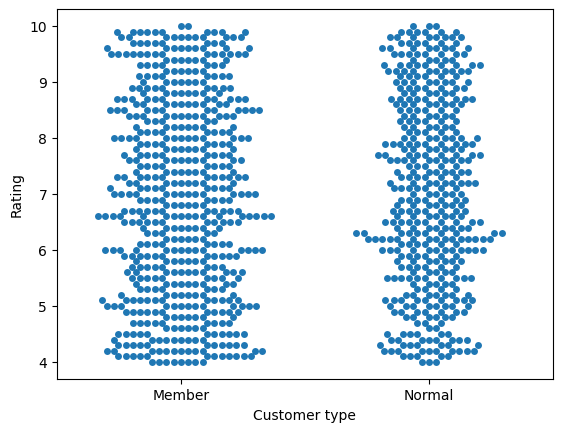

In [79]:
sns.swarmplot(x='Customer type',y='Rating',data=sales)

<Axes: xlabel='Customer type', ylabel='Rating'>

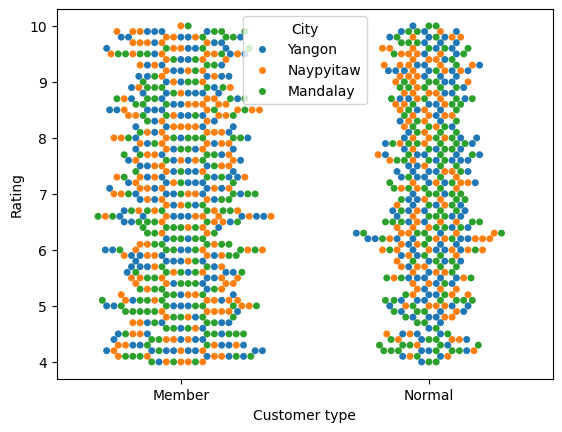

In [82]:
sns.swarmplot(x='Customer type',y='Rating',data=sales,hue='City')

<Axes: xlabel='Customer type', ylabel='Rating'>

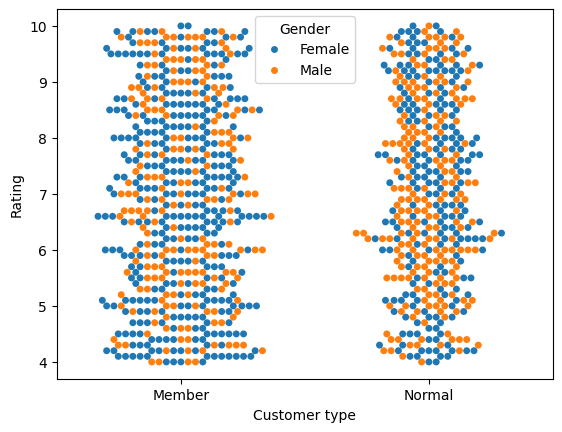

In [83]:
sns.swarmplot(x='Customer type',y='Rating',data=sales,hue='Gender')

In [88]:
sales[sales['Customer type'] == 'Normal']['Rating']


,Rating
1,9.6
2,7.4
130,7.5
132,7.4
134,5.3
...,...
992,8.8
993,6.6
995,6.2
996,4.4


In [89]:
!pip install wordcloud

In [91]:
from wordcloud import WordCloud

In [92]:
' '.join(sales['Product line'])

'Health and beauty Electronic accessories Home and lifestyle Health and beauty Sports and travel Electronic accessories Electronic accessories Home and lifestyle Health and beauty Food and beverages Fashion accessories Electronic accessories Electronic accessories Food and beverages Health and beauty Sports and travel Health and beauty Sports and travel Food and beverages Home and lifestyle Electronic accessories Health and beauty Home and lifestyle Electronic accessories Sports and travel Home and lifestyle Fashion accessories Fashion accessories Food and beverages Health and beauty Fashion accessories Sports and travel Sports and travel Health and beauty Food and beverages Sports and travel Sports and travel Electronic accessories Health and beauty Home and lifestyle Home and lifestyle Home and lifestyle Sports and travel Food and beverages Health and beauty Electronic accessories Health and beauty Food and beverages Electronic accessories Fashion accessories Food and beverages Food 

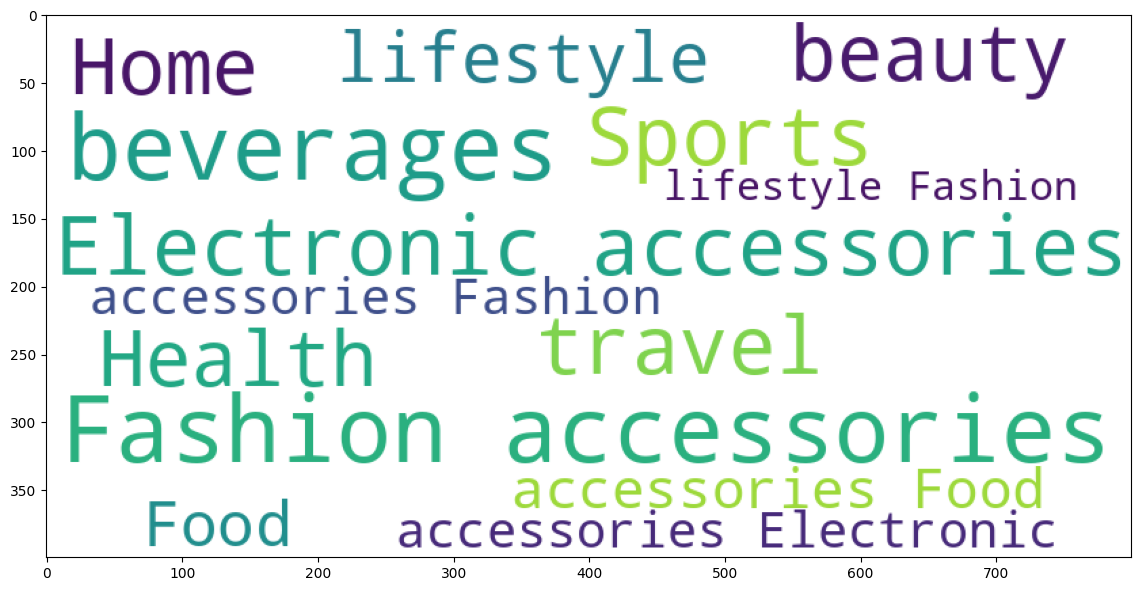

In [101]:
plt.figure(figsize=(14,8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sales['Product line']))
plt.imshow(wordcloud)

In [102]:
bar=sales.groupby('Product line').agg({'Product line':'count'})


In [103]:
bar.head()

,Product line
Product line,
Electronic accessories,170
Fashion accessories,178
Food and beverages,174
Health and beauty,152
Home and lifestyle,160


<Axes: xlabel='Product line', ylabel='Product line'>

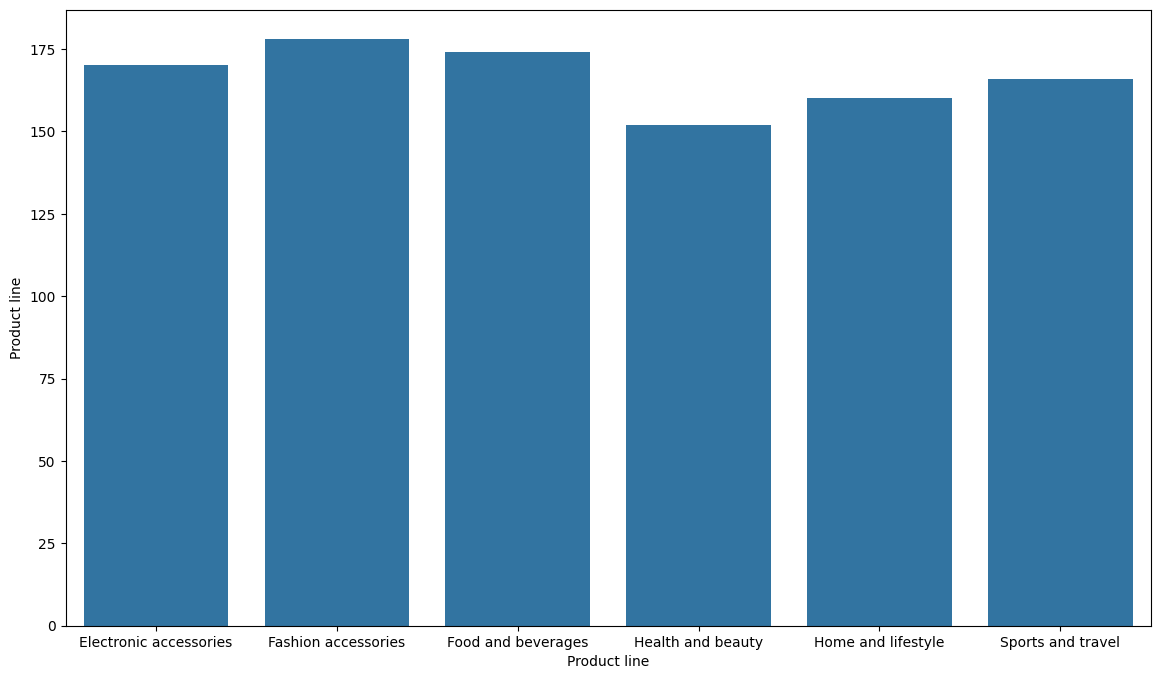

In [106]:
plt.figure(figsize=(14,8) )
sns.barplot(x=bar.index,y='Product line',data=bar)